In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.metrics import classification_report
from sklearn import preprocessing
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Importing Data Set with Randomized Index

In [3]:
data = pd.read_csv("beatlesrandom.csv")
data = data.rename(columns = {"Unnamed: 0":"INDEX"})

In [4]:
data.columns

Index(['INDEX', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_name', 'track_number',
       'short_album_name', 'release_date', 'album_cover', 'duration_seconds',
       'track1', 'last_track'],
      dtype='object')

# Removing columns not using for ML yet

In [5]:
data.drop(['INDEX'],inplace=True, axis=1)
data.drop(['album_cover'],inplace=True, axis=1)

In [6]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_name,track_number,short_album_name,release_date,duration_seconds,track1,last_track
0,0.294,0.407,0,-11.575,1,0.0308,0.0258,0.000219,0.0852,0.0378,101.052,4,Blue Jay Way,4,Magical Mystery Tour,1967-11-27,235.067,0,0
1,0.612,0.788,0,-6.251,1,0.0335,0.3670,0.000000,0.3820,0.9610,129.161,4,You Can't Do That,12,A Hard Day's Night,1964-07-10,154.893,0,0
2,0.422,0.656,4,-8.412,1,0.0397,0.0126,0.027900,0.2680,0.5490,173.930,3,Oh! Darling,4,Abbey Road,1969-09-26,207.240,0,0
3,0.538,0.478,11,-8.957,0,0.0388,0.4720,0.000000,0.1700,0.5270,59.004,4,Dig A Pony,2,Let It Be,1970-05-08,235.000,0,0
4,0.297,0.613,9,-9.065,1,0.0931,0.0385,0.000040,0.0734,0.3380,170.962,4,Magical Mystery Tour,1,Magical Mystery Tour,1967-11-27,170.107,1,0


# Classify songs with their Album by Audio Characteristics 
Features = X
Label = y (short_album_name) 

Subsetting data to only be Audio Features

In [7]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'track_name', 'track_number', 'short_album_name',
       'release_date', 'duration_seconds', 'track1', 'last_track'],
      dtype='object')

In [8]:
df = data[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'short_album_name','duration_seconds']]

In [9]:
df["mode"].value_counts()

1    153
0     37
Name: mode, dtype: int64

mode is binary and we won't work well in our knn model 

In [10]:
df = pd.DataFrame(df)
df.shape

(190, 14)

# Knn


In [11]:
features = df[['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature','duration_seconds']]
label=df["short_album_name"]

# Scaling Features
*need to scale features for this to work properly 
*All features continious variables 
*No NA


In [12]:
features = preprocessing.StandardScaler().fit(features).transform(features.astype(float))

# Split training and test set 
stratify argument to make sure albums are distributed as in the orginal dataset 

Did a larger test size since the data set is small. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size = 0.40,random_state=9,stratify = label)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(114, 12)
(76, 12)
(114,)
(76,)


# Elbow Method for picking a k value

In [15]:
error_rate = []
# see error rate for k values between 1 and 20
for i in range(1,21):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

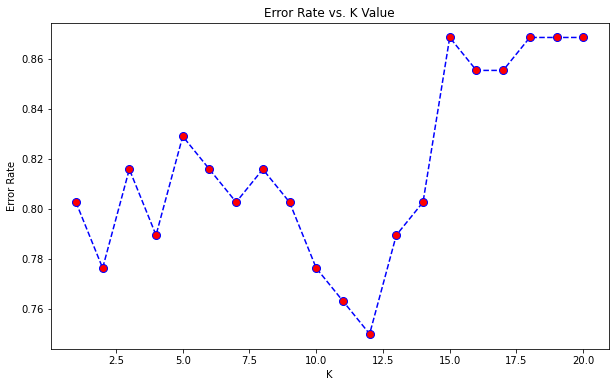

In [16]:
plt.figure(figsize=(10,6))
plt.plot(range(1,21),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Use a kvalue of 11  

In [17]:
param_grid = {"n_neighbors":np.arange(1,30)}

In [18]:
knn = KNeighborsClassifier()

Performing cross validation on only training set 

In [33]:
knn_cv = GridSearchCV(knn,param_grid,cv=6)

In [34]:
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [35]:
knn_cv.best_params_

{'n_neighbors': 1}

In [36]:
knn_cv.best_score_

0.20175438596491227

In [37]:
knn = KNeighborsClassifier(n_neighbors=2)

In [38]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

See how model does on predicting using Test set. 

In [39]:
prediction = knn.predict(X_test)

# Comparing Train and Test Set Accuracy

In [40]:
print("Accuracy of model at K 2 is",metrics.accuracy_score(y_test, prediction))

Accuracy of model at K 2 is 0.2236842105263158


In [41]:
knn.score(X_train,y_train)
print("Accuracy of training set",knn.score(X_train,y_train))

Accuracy of training set 0.6052631578947368


Model did not do well. 

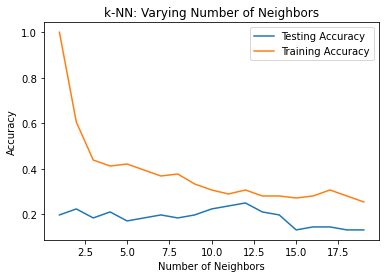

In [27]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [28]:
print(round(0.60-0.22,2),"Percent difference")

0.38 Percent difference


There was a large differene between our training set performance and test set.
The higher k value the more closer are performance for test and training set are together. 
Which makes sense because a larger 
K = Reduced risk of overfitting the training set
Since we have such a low k value we have a huge difference in our test/training set accuracy since our small K overfits the training data. 

Going to instead use a larger k value that doesn't have as large of a gap.

In [29]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print("Accuracy of model at K 11 is",metrics.accuracy_score(y_test, prediction))
print("Accuracy of training 11 is ",knn.score(X_train,y_train))
print(round(0.28-0.23,2),"Percent difference")

Accuracy of model at K 11 is 0.23684210526315788
Accuracy of training 11 is  0.2894736842105263
0.05 Percent difference


Able to reduce the gap between training and test set performance by 33% while not sacerficing as much accuracy. 

In [30]:
y_testarray = np.array(y_test)

In [31]:
print(classification_report(y_test, prediction,zero_division=0))

                                       precision    recall  f1-score   support

                   A Hard Day's Night       0.25      0.40      0.31         5
                           Abbey Road       1.00      0.43      0.60         7
                     Beatles For Sale       0.33      0.33      0.33         6
                                Help!       0.22      0.40      0.29         5
                            Let It Be       0.00      0.00      0.00         5
                 Magical Mystery Tour       0.00      0.00      0.00         4
                     Please Please Me       0.25      0.50      0.33         6
                             Revolver       0.00      0.00      0.00         6
                          Rubber Soul       0.38      0.50      0.43         6
Sgt. Pepper's Lonely Hearts Club Band       0.12      0.12      0.12         8
                          The Beatles       0.00      0.00      0.00         8
                     With The Beatles       0.00   

We want a f1-score closer to 1 indicating better model performance.

* Let it Be : Unable to correctly classify the 5 instances of this album at all.
* Magical Mystery Tour: Unable to classify the 4 instances of this album at all
* Revolver: Unable to classify the 6 instances of this album at all 
* The Beatles: Unable to correctly classify the 8 instance of this album at all.
* With The Beatles: Unable to correctly classify the 5 instance of this album at all.


* The album that had the best f1-score was Abbey Road.
Overall the model did not perform well with the kNN method.



# Performing Model with a larger training set 

When I reperform the model with a larger training set the model performs with a similar result just lower album instances. 
With an optimal k value of 19

In [32]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, label, test_size = 0.20,random_state=9,stratify = label)

In [33]:
knn = KNeighborsClassifier(n_neighbors=19)

In [34]:
knn.fit(X_train2,y_train2)
prediction2 = knn.predict(X_test2)
print("Accuracy of model at K 19 is",metrics.accuracy_score(y_test2, prediction2))
knn.score(X_train2,y_train2)
print("Accuracy of training set",knn.score(X_train2,y_train2))

Accuracy of model at K 19 is 0.2631578947368421
Accuracy of training set 0.3223684210526316


In [36]:
print(round(0.32-0.26,2),"Percent difference")

0.06 Percent difference


In [35]:
print(classification_report(y_test2, prediction2,zero_division=0))

                                       precision    recall  f1-score   support

                   A Hard Day's Night       0.33      0.33      0.33         3
                           Abbey Road       0.00      0.00      0.00         3
                     Beatles For Sale       0.14      0.33      0.20         3
                                Help!       0.25      0.33      0.29         3
                            Let It Be       0.00      0.00      0.00         2
                 Magical Mystery Tour       0.00      0.00      0.00         2
                     Please Please Me       0.43      1.00      0.60         3
                             Revolver       0.20      0.33      0.25         3
                          Rubber Soul       0.33      0.67      0.44         3
Sgt. Pepper's Lonely Hearts Club Band       0.00      0.00      0.00         4
                          The Beatles       0.00      0.00      0.00         4
                     With The Beatles       0.00   

This model was unable to predict any instances of Abbey Road correctly unlike before when it was our best performing classification category. 

With such a low model accuracy score using the KNN method we are unable to justify a stable model. 